In [1]:
import numpy as np
import matplotlib.pyplot as plt

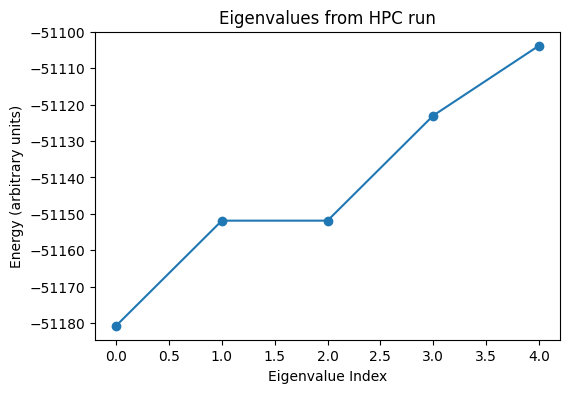

In [2]:
# Load HPC results
N = 80 # Adjust as needed (use the largest N you ran on HPC)
data = np.loadtxt(f'eigs_N{N}.txt')
plt.figure(figsize=(6,4))
plt.plot(data, 'o-')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Energy (arbitrary units)')
plt.title('Eigenvalues from HPC run')
plt.show()

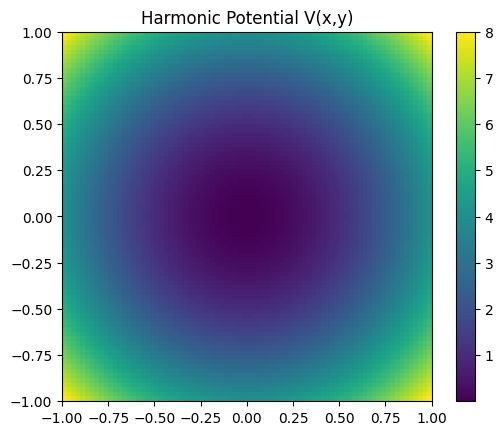

In [3]:
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
V = 4. * (X**2 + Y**2)
plt.figure()
plt.imshow(V.T, origin='lower', extent=(-1, 1, -1, 1))
plt.colorbar()
plt.title('Harmonic Potential V(x,y)')
plt.show()


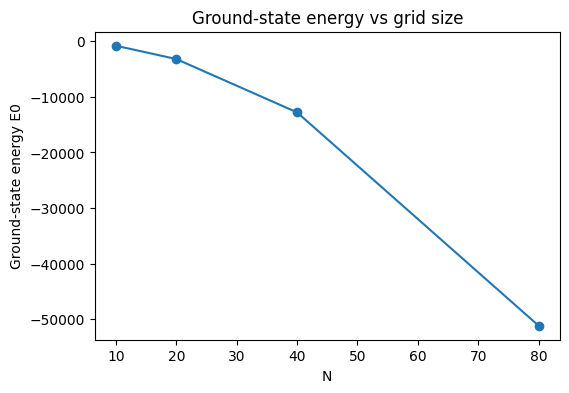

In [6]:
Ns = np.array([10, 20, 40, 80])

E0 = np.array([np.loadtxt(f"eigs_N{N}.txt")[0] for N in Ns])

plt.figure(figsize=(6,4))
plt.plot(Ns, E0, 'o-')
plt.xlabel("N")
plt.ylabel("Ground-state energy E0")
plt.title("Ground-state energy vs grid size")
plt.show()

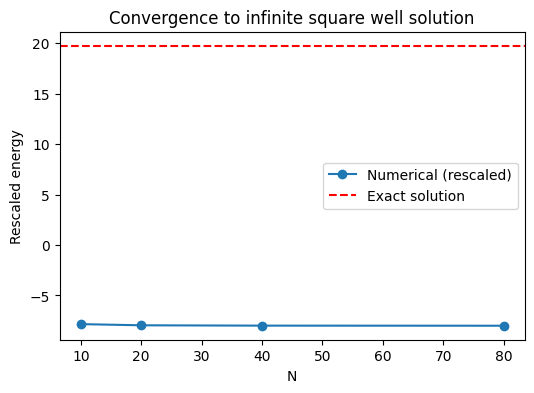

In [11]:
eig_data = {N: np.loadtxt(f"eigs_N{N}.txt") for N in Ns}

E0_scaled = np.array([eig_data[N][0] / (N**2) for N in Ns])

E_exact = 2 * np.pi**2  # analytical ground-state energy

plt.figure(figsize=(6,4))
plt.plot(Ns, E0_scaled, 'o-', label="Numerical (rescaled)")
plt.axhline(E_exact, linestyle='dashed', color='red', label="Exact solution")

plt.xlabel("N")
plt.ylabel("Rescaled energy")
plt.title("Convergence to infinite square well solution")
plt.legend()
plt.show()

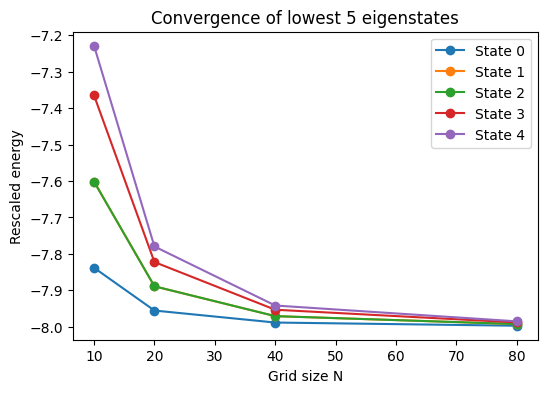

In [12]:
plt.figure(figsize=(6,4))

for i in range(5):
    Ei = np.array([eig_data[N][i] / (N**2) for N in Ns])
    plt.plot(Ns, Ei, 'o-', label=f"State {i}")

plt.xlabel("Grid size N")
plt.ylabel("Rescaled energy")
plt.title("Convergence of lowest 5 eigenstates")
plt.legend()
plt.show()